- 数据集：
    - 数据集一共提供了7043条用户样本，每条样本包含21列属性，由多个维度的客户信息以及用户是否最终流失的标签组成，客户信息具体如下：
    - 21列原始属性中，除了最后一列Churn表示该数据集的目标变量（即标签列）外，其余20列按照原始数据集中的排列顺序刚好可以分为三类特征群：
    客户的基本信息、开通业务信息、签署的合约信息。每一列具体信息如下：
    

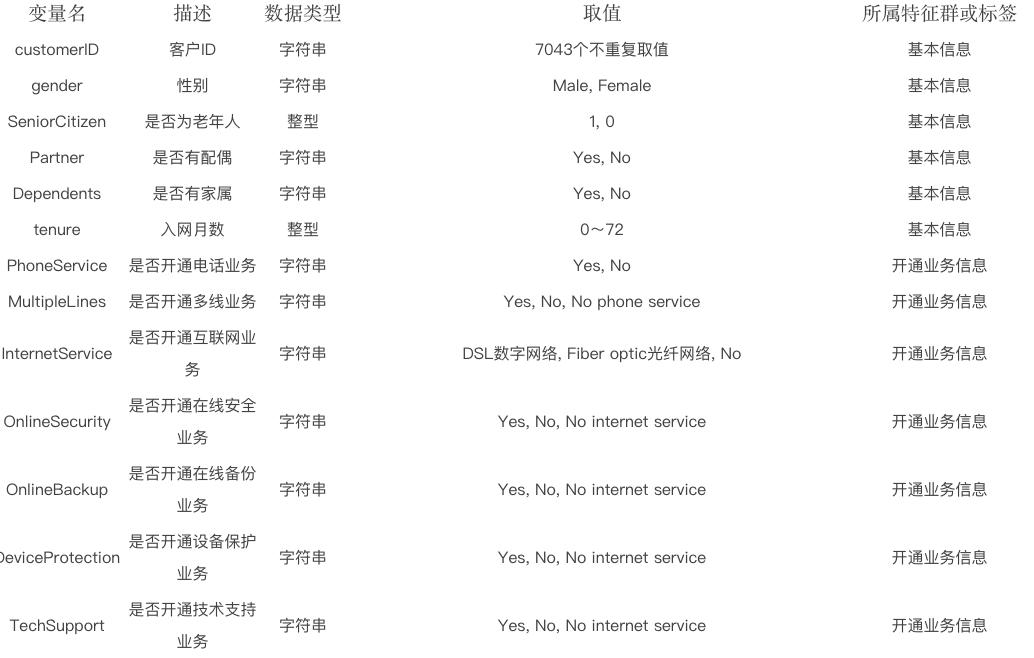

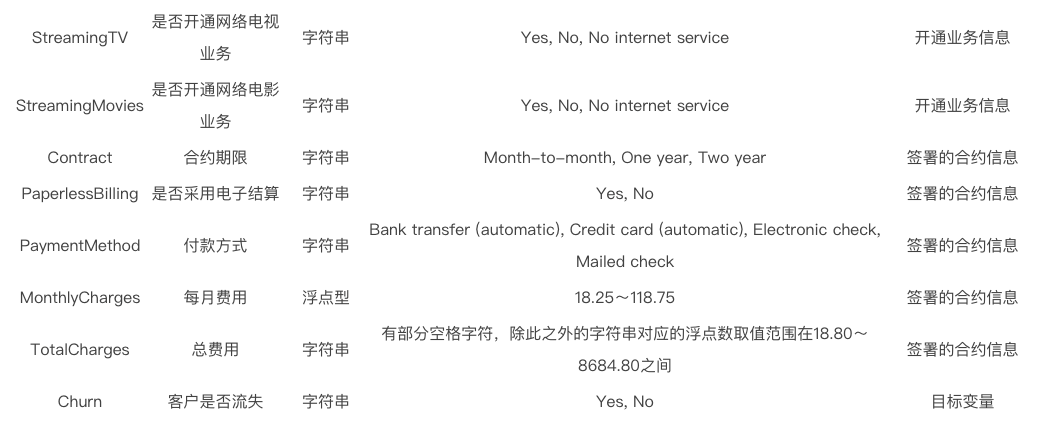

- 注意：
    - 电信用户流失预测中，运营商最为关心的是客户的召回率，即在真正流失的样本中，我们预测到多少条样本。其策略是宁可把未流失的客户预测为流失客户而进行多余的留客行为，也不漏掉任何一名真正流失的客户。

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore') #  忽略弹出的warnings信息
data = pd.read_csv('./WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [2]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 数据预处理

- 首先查看数据集中是否有重复值。

In [4]:
data.duplicated().sum()

0

- 统计数据集中缺失值情况：

In [5]:
data.isnull().any().sum()

0

- 可能存在这样的情况：数据集采用 'Null'、'NaN'、' ' 等字符（串）表示缺失。
    - 数据集中就有这样一列TotalCharges特征，存在特征值为空格字符（' '）
    - 如果缺失数据不多则可直接删除行
    - TotalCharge表示总费用，原始数据类型为字符串，可以将其修改成数值型

In [6]:
(data['TotalCharges'] == ' ').sum()

11

In [7]:
drop_index = data.loc[data['TotalCharges'] == ' '].index

In [8]:
data.drop(labels=drop_index,axis=0,inplace=True)

In [9]:
data['TotalCharges'] = data['TotalCharges'].astype(dtype='float')

- 异常数据处理

In [10]:
#发现只有4列为数值型特征，其中SeniorCitizen只有0，1组成可以视为类别特征，无需进行异常值处理
data.describe([0.2,0.5,0.9,0.99]).T

,count,mean,std,min,20%,50%,90%,99%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.00,0.000,1.000,1.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,6.00,29.000,69.000,72.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,25.05,70.350,102.645,114.7345,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,267.07,1397.475,5976.640,8039.8830,8684.80


- 使用箱型图对tenure、MonthlyCharges和TotalCharges进行异常值探索

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'tenure')

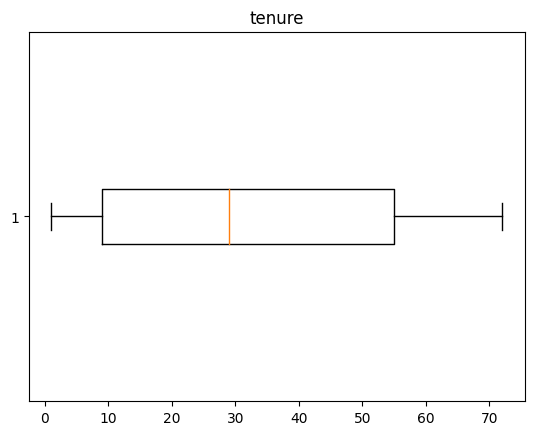

In [12]:
a = plt.boxplot(data['tenure'],vert=False)
plt.title('tenure')

Text(0.5, 1.0, 'MonthlyCharges')

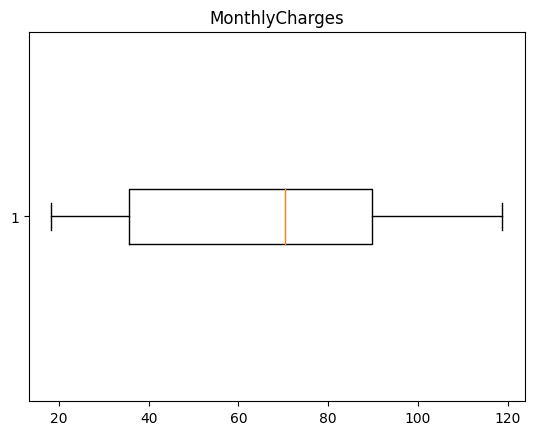

In [13]:
a = plt.boxplot(data['MonthlyCharges'],vert=False)
plt.title('MonthlyCharges')

Text(0.5, 1.0, 'TotalCharges')

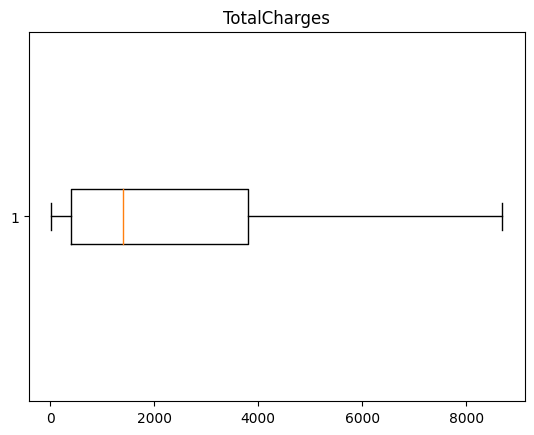

In [14]:
a = plt.boxplot(data['TotalCharges'],vert=False)
plt.title('TotalCharges')

- 由箱型图直观可见，这三列数值特征均不含离群点（即异常值）。


### 特征工程

#### 特征抽取

- 在特征介绍图中观察如下几列特征的组成元素：
    - ‘MultipleLines’，'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
    - 发现MultipleLines特征组成元素为：yes，no和No phone service
    - 剩下几列特征的组成元素为：yes，no和No internet service，那么No phone service就表示no，所以可以将其修改为no，从而减少特征组成元素的数量，方便后期进行特征值化

In [15]:
data.loc[data['MultipleLines']=='No phone service', 'MultipleLines'] = 'No'
internetCols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in internetCols:
    data.loc[data[i]=='No internet service', i] = 'No'

- 一些类别特征只有两类取值，可以直接用0、1代替
    - 'Partner','Dependents','PhoneService','MultipleLines'，'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling'
-  顺便把目标变量也进行编码,直接用0、1代替 


In [16]:
cols_name = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling']
for col in cols_name:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

In [17]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

- 其他无序的类别特征采用独热编码
    - 'InternetService', 'Contract', 'PaymentMethod'

In [18]:
cols_name = ['InternetService', 'Contract', 'PaymentMethod']
for col in cols_name:
    oneHot_df = pd.get_dummies(data[col],prefix=col) 
    data = pd.concat(objs=[data,oneHot_df],axis=1)

In [19]:
#删除原来的列
data.drop(labels=cols_name,axis=1,inplace=True)

#### 特征选择

- 'customerID'特征的每个特征值都不同，因此对模型预测不起贡献，可以直接删除。

In [20]:
data.drop(labels='customerID',axis=1,inplace=True)

##### 通过可视化分析探测不重要的特征，进行特征选择

- 基本特征对客户流失影响
    - 性别、是否老年人、是否有配偶、是否有家属特征对客户流失的影响(占比情况:例如在性别特征中，统计女性流失占不流失的比例and男性)
        - 'gender', 'SeniorCitizen', 'Partner', 'Dependents'
        - 这些特征的组成元素只有【是和否】
    - 入网月数特征对客户流失的影响
        - ‘tenure’
        - 该特征的组成元素有多个

In [21]:
pd.crosstab(data['gender'], data['Churn'])

Churn,0,1
gender,,
Female,2544,939
Male,2619,930


In [22]:
baseCols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
for col in baseCols:
    col_df = pd.crosstab(data[col], data['Churn'])
    p_a = col_df.iloc[0][1] / col_df.iloc[0][0]
    p_b = col_df.iloc[1][1] / col_df.iloc[1][0]
    print(col,":",p_a,p_b)

gender : 0.36910377358490565 0.3550973654066438
SeniorCitizen : 0.3097620635979542 0.7147147147147147
Partner : 0.4920049200492005 0.24559471365638766
Dependents : 0.4551622418879056 0.18386914833615342


由数据可知：性别对客户流失基本没有影响；年龄对客户流失有影响；是否有配偶对客户流失有影响；是否有家属对客户流失有影响。

- 观察流失率和入网月数之间的关系
    - 计算不同入网月数对应的流失率（每月流失客户占当月总客户的比例）

In [23]:
s = data.groupby(by='tenure')['Churn'].sum() / data.groupby(by='tenure')['Churn'].count()
s

tenure
1.0     0.619902
2.0     0.516807
3.0     0.470000
4.0     0.471591
5.0     0.481203
          ...   
68.0    0.090000
69.0    0.084211
70.0    0.092437
71.0    0.035294
72.0    0.016575
Name: Churn, Length: 72, dtype: float64

Text(0, 0.5, 'p')

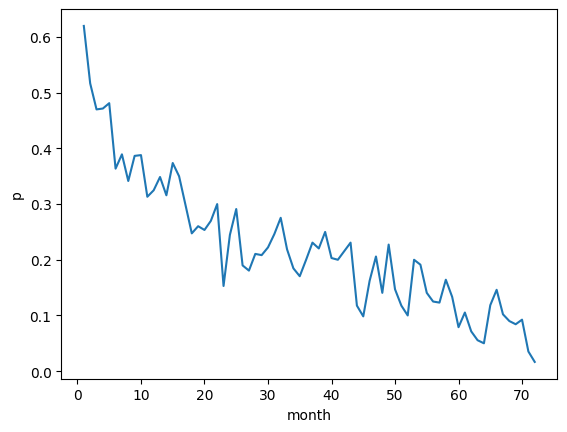

In [24]:
plt.plot(s.index,s.values)
plt.xlabel('month')
plt.ylabel('p')

发现：流失率随着入网时间的延长呈下降趋势

- 剩下的合约类型特征、业务类型特征同上进行分析即可，最终发现如下特征对目标标签没有影响，可以将其删除
    - 'gender'、'PhoneService'、'StreamingTV' 和 'StreamingMovies'

In [25]:
data.drop(labels=['gender','PhoneService','StreamingTV','StreamingMovies'],axis=1,inplace=True)

- 可以对数据集中的三列连续型数值特征 'tenure', 'MonthlyCharges', 'TotalCharges' 计算相关系数.
    - 如果存在较强相关性，因此可以考虑删除该列，以避免特征冗余

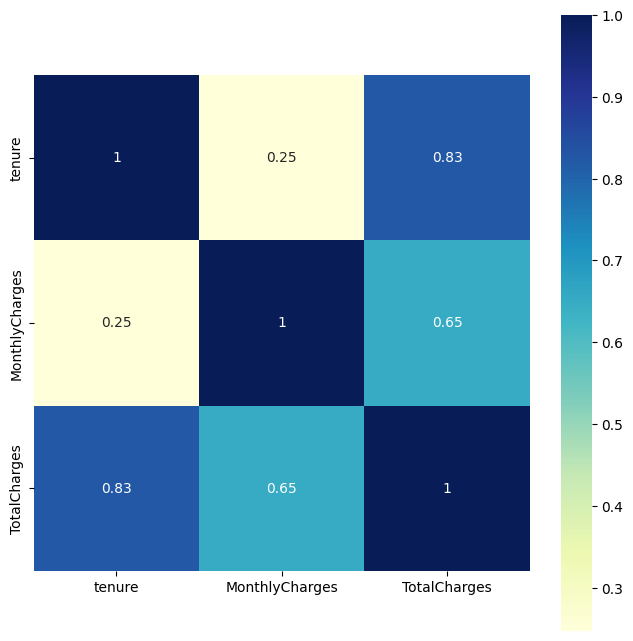

In [26]:
import seaborn as sns
nu_fea = data[['tenure', 'MonthlyCharges', 'TotalCharges']]    # 选择连续型数值特征计算相关系数
nu_fea = list(nu_fea)    # 特征名列表
pearson_mat = data[nu_fea].corr()  
plt.figure(figsize=(8,8)) # 建立图像
sns.heatmap(pearson_mat, square=True, annot=True, cmap="YlGnBu")    # 用热度图表示相关系数矩阵
plt.show() # 展示热度图

其中 'TotalCharges' 与其他两列特征的相关系数均大于0.6，即存在较强相关性，因此可以考虑删除该列

In [27]:
data.drop(labels='TotalCharges',axis=1,inplace=True)

#### 类别不平衡问题处理

- 不同样本类别数量统计

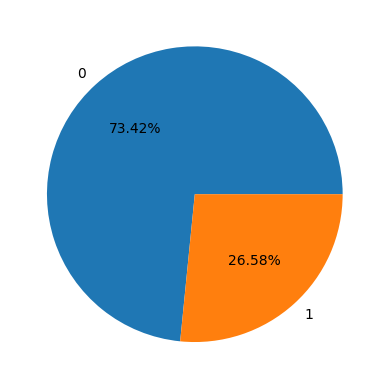

In [28]:
from matplotlib import pyplot as plt
p = data['Churn'].value_counts()
a = plt.pie(p,autopct='%.2f%%',labels=p.index)

- 由饼状图可见流失用户占比为26.54%，存在类别不平衡现象，需要进行相应处理。

In [29]:
# Separate labels from data     
x_cols = [col for col in data.columns if col != 'Churn']
X = data[x_cols]
y = data['Churn']

In [30]:
X.describe()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,0.482509,0.298493,32.421786,0.421928,0.286547,0.344852,0.343857,0.290102,0.592719,64.798208
std,0.368844,0.499729,0.457629,24.545260,0.493902,0.452180,0.475354,0.475028,0.453842,0.491363,30.085974
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000
25%,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500
50%,0.000000,0.000000,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000


In [31]:
y.describe()

count    7032.000000
mean        0.265785
std         0.441782
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Churn, dtype: float64

Class 0: 5163
Class 1: 1869
Proportion: 2.76 : 1


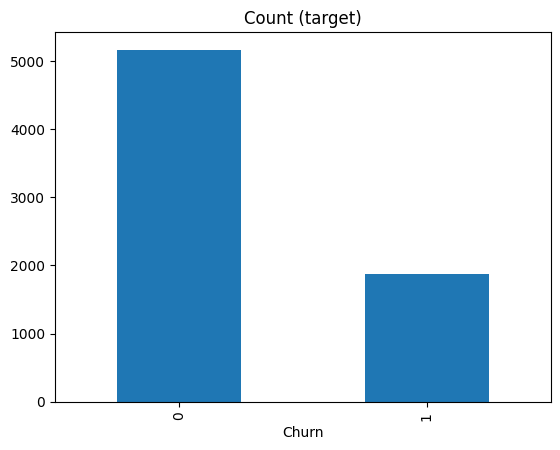

In [32]:
target_count = y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0, sampling_strategy='auto')
X_sm, y_sm = smote.fit_resample(X, y)

In [35]:
data

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1,0,1.0,0,0,1,0,0,1,...,True,False,False,True,False,False,False,False,True,False
1,0.0,0,0,34.0,0,1,0,1,0,0,...,True,False,False,False,True,False,False,False,False,True
2,0.0,0,0,2.0,0,1,1,0,0,1,...,True,False,False,True,False,False,False,False,False,True
3,0.0,0,0,45.0,0,1,0,1,1,0,...,True,False,False,False,True,False,True,False,False,False
4,0.0,0,0,2.0,0,0,0,0,0,1,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1,1,24.0,1,1,0,1,1,1,...,True,False,False,False,True,False,False,False,False,True
7039,0.0,1,1,72.0,1,0,1,1,0,1,...,False,True,False,False,True,False,False,True,False,False
7040,0.0,1,1,11.0,0,1,0,0,0,1,...,True,False,False,True,False,False,False,False,True,False
7041,1.0,1,0,4.0,1,0,0,0,0,1,...,False,True,False,True,False,False,False,False,False,True


Class 0: 5163
Class 1: 5163
Proportion: 1.0 : 1


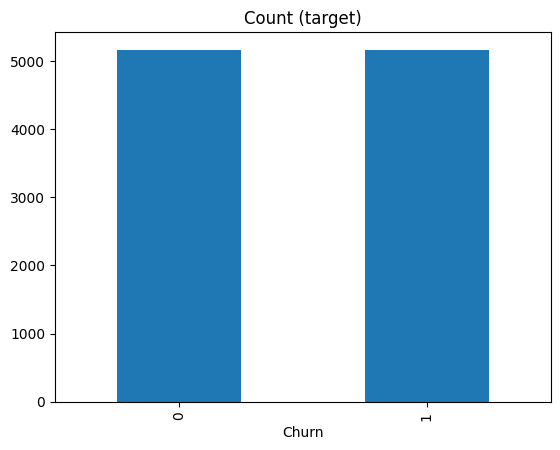

In [36]:
target_count = y_sm.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [37]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### 模型选择和评估

- 召回率代表的意义则是：在真正流失的样本中，我们预测到多少条样本。很明显，召回率是运营商们关心的指标，即宁可把未流失的客户预测为流失客户而进行多余的留客行为，也不漏掉任何一名真正流失的客户。

In [38]:
from sklearn.linear_model import LogisticRegression    # 逻辑回归
from sklearn.svm import SVC                                          # SVM
from sklearn.ensemble import RandomForestClassifier    # 随机森林
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from mlxtend.classifier import StackingCVClassifier
import xgboost as xgb
import itertools
#from xgboost import XGBRegressor as XGBR                     #XGBoost
#from lightgbm import LGBMClassifier                                   #LGB
from sklearn.metrics import recall_score, f1_score    
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report,f1_score


In [39]:
#to print confusion matrix
from sklearn.metrics import confusion_matrix
#to print metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics

## Logistic Regression

In [40]:
#INSTANTIATE LOGISTIC REGRESSION
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_log = logreg.predict(x_test)
lr_acc_score=metrics.accuracy_score(y_test, y_pred_log)
lr_f1_score=metrics.f1_score(y_test, y_pred_log)
lr_conf_matrix = confusion_matrix(y_test, y_pred_log)
# checking accuracy
print('Test Accuracy score: ', lr_acc_score)
print('Test F1 score: ', lr_f1_score)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_log))

Test Accuracy score:  0.8523717328170377
Test F1 score:  0.8568747067104645
confusion matrix
[[848 158]
 [147 913]]


              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1006
           1       0.85      0.86      0.86      1060

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



## KNN

In [41]:
#INSTANTIATE KNN MODEL
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
# make class predictions for the testing set
y_pred_knn = knn.predict(x_test)
knn_acc_score=metrics.accuracy_score(y_test, y_pred_knn)
knn_f1_score=metrics.f1_score(y_test, y_pred_knn)
knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
# checking accuracy
print('Test Accuracy score: ', knn_acc_score)
print('Test F1 score: ',knn_f1_score )
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_knn))

Test Accuracy score:  0.829622458857696
Test F1 score:  0.8353601496725912
confusion matrix
[[821 185]
 [167 893]]


              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1006
           1       0.83      0.84      0.84      1060

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



## Random Forest

In [42]:
#INSTANTIATE RANDOM FOREST MODEL
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred_forest = rfc.predict(x_test)
rfc_acc_score=metrics.accuracy_score(y_test, y_pred_forest)
rfc_f1_score = metrics.f1_score(y_test, y_pred_forest)
rfc_conf_matrix=confusion_matrix(y_test,y_pred_forest)
# checking accuracy
print('Test Accuracy score: ', rfc_acc_score)
print('Test F1 score: ', rfc_f1_score)
print("confusion matrix")
print(rfc_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_forest))

Test Accuracy score:  0.8504356243949661
Test F1 score:  0.8523650262780698
confusion matrix
[[865 141]
 [168 892]]


              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1006
           1       0.86      0.84      0.85      1060

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



## Naive Bayes

In [43]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test,y_pred_nb)
nb_acc_score = metrics.accuracy_score(y_test, y_pred_nb)
nb_f1_score=metrics.f1_score(y_test, y_pred_nb)
print('Test Accuracy score: ',nb_acc_score)
print('Test F1 score: ', nb_f1_score)
print("confusion matrix")
print(nb_conf_matrix)
print("\n")
print(classification_report(y_test,y_pred_nb))

Test Accuracy score:  0.8151016456921588
Test F1 score:  0.8247706422018349
confusion matrix
[[785 221]
 [161 899]]


              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1006
           1       0.80      0.85      0.82      1060

    accuracy                           0.82      2066
   macro avg       0.82      0.81      0.81      2066
weighted avg       0.82      0.82      0.81      2066



## Support Vector Classifier

In [44]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
svc_conf_matrix = confusion_matrix(y_test, y_pred_svc)
svc_acc_score = metrics.accuracy_score(y_test, y_pred_svc)
svc_f1_score = metrics.f1_score(y_test, y_pred_svc)
print('Test Accuracy score: ',svc_acc_score)
print('Test F1 score: ', svc_f1_score)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score,'\n')
print(classification_report(y_test,y_pred_svc))

Test Accuracy score:  0.850919651500484
Test F1 score:  0.856610800744879
confusion matrix
[[838 168]
 [140 920]]


Accuracy of Support Vector Classifier: 0.850919651500484 

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1006
           1       0.85      0.87      0.86      1060

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



### XTree

In [45]:
xtree=ExtraTreesClassifier()
xtree.fit(x_train, y_train)
y_pred_xtree = xtree.predict(x_test)
xtree_conf_matrix = confusion_matrix(y_test, y_pred_xtree)
xtree_acc_score = metrics.accuracy_score(y_test, y_pred_xtree)
xtree_f1_score = metrics.f1_score(y_test, y_pred_xtree)
print('Test Accuracy score: ',xtree_acc_score)
print('Test F1 score: ', xtree_f1_score)
print("confusion matrix")
print(xtree_conf_matrix)
print("\n")
print("Accuracy of XTree Classifier:",xtree_acc_score,'\n')
print(classification_report(y_test,y_pred_xtree))

Test Accuracy score:  0.8455953533397871
Test F1 score:  0.8470023980815348
confusion matrix
[[864 142]
 [177 883]]


Accuracy of XTree Classifier: 0.8455953533397871 

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1006
           1       0.86      0.83      0.85      1060

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



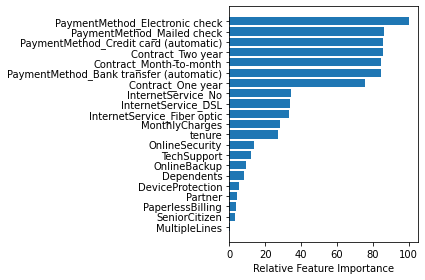

In [46]:
feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

# Model Evaluation

In [47]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Naive Bayes', 'Support Vector Classifier','Xtree Classifier'], 'Accuracy': [lr_acc_score,
                    rfc_acc_score,knn_acc_score,nb_acc_score, svc_acc_score,xtree_acc_score]})
model_ev

,Model,Accuracy
0,Logistic Regression,0.852372
1,Random Forest,0.850436
2,K-Nearest Neighbour,0.829622
3,Naive Bayes,0.815102
4,Support Vector Classifier,0.850920
5,Xtree Classifier,0.845595


# Ensembling

In [48]:
scv=StackingCVClassifier(classifiers=[logreg,rfc,svc],meta_classifier=svc,random_state=42)
scv.fit(x_train,y_train)
scv_predicted = scv.predict(x_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
scv_f1_score = f1_score(y_test, scv_predicted)

print("confusion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confusion matrix
[[832 174]
 [116 944]]


Accuracy of StackingCVClassifier: 85.96321393998065 

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1006
           1       0.84      0.89      0.87      1060

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066



In [49]:
cm = confusion_matrix(y_test, scv_predicted)
classes = ['No', 'Yes']

In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')   

Confusion Matrix, without normalization
[[832 174]
 [116 944]]


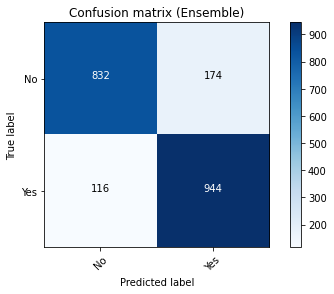

In [51]:
plot=plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix (Ensemble)',
                          cmap=plt.cm.Blues)

In [52]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_log)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_forest)
fpr_nb, tpr_nb, thresholds_log = roc_curve(y_test, y_pred_nb)
fpr_svc, tpr_svc, thresholds_log = roc_curve(y_test, y_pred_svc)
fpr_xtree, tpr_xtree, thresholds_xtree = roc_curve(y_test, y_pred_xtree)
fpr_ens, tpr_ens, thresholds_ens = roc_curve(y_test, scv_predicted)

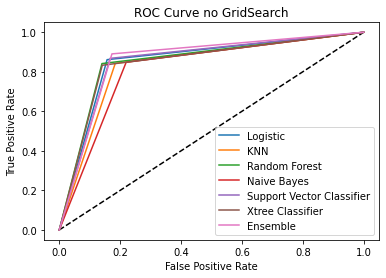

In [53]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log, tpr_log,label = 'Logistic')
plt.plot(fpr_knn, tpr_knn,label = 'KNN')
plt.plot(fpr_rfc, tpr_rfc,label = 'Random Forest')
plt.plot(fpr_nb,tpr_nb,label= 'Naive Bayes')
plt.plot(fpr_svc,tpr_svc,label= 'Support Vector Classifier')
plt.plot(fpr_xtree,tpr_xtree,label= 'Xtree Classifier')
plt.plot(fpr_ens, tpr_ens,label = 'Ensemble')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve no GridSearch')
plt.show()

In [54]:
# Compute and print AUC score
print("AUC Logistic: {}".format(roc_auc_score(y_test, y_pred_log)))
print("AUC KNN: {}".format(roc_auc_score(y_test, y_pred_knn)))
print("AUC Random Forest: {}".format(roc_auc_score(y_test, y_pred_forest)))
print("AUC Naive Bayes: {}".format(roc_auc_score(y_test, y_pred_nb)))
print("AUC Support Vector Classifier: {}".format(roc_auc_score(y_test, y_pred_svc)))
print("AUC Xtree Classifier: {}".format(roc_auc_score(y_test, y_pred_xtree)))
print("AUC Ensemble: {}".format(roc_auc_score(y_test, scv_predicted)))

AUC Logistic: 0.8521315503207172
AUC KNN: 0.8292781049551747
AUC Random Forest: 0.850675194118309
AUC Naive Bayes: 0.814215649499231
AUC Support Vector Classifier: 0.8504632581867287
AUC Xtree Classifier: 0.8459328932067969
AUC Ensemble: 0.858801905547845


# Grid Search CV

In [55]:
from sklearn.model_selection import cross_val_score, GridSearchCV

## LR Grid

In [56]:
#SET PARAMATER GRID
param_grid_log =  {'penalty' : ['l1', 'l2'],
                   'C' : np.logspace(-4, 4, 20),
                  }
grid_search_log = GridSearchCV(estimator = logreg, param_grid = param_grid_log,cv = 7,scoring = 'accuracy',n_jobs = -1)

In [57]:
grid_search_log.fit(x_train,y_train)
log_params = grid_search_log.best_params_
print(log_params)

{'C': 29.763514416313132, 'penalty': 'l2'}


In [58]:
logreg_grid = LogisticRegression(**log_params)

logreg_grid.fit(x_train, y_train)

y_pred_log_grid = logreg_grid.predict(x_test)

lr_f1_score2=metrics.f1_score(y_test, y_pred_log_grid)
lr_acc_score2=metrics.accuracy_score(y_test, y_pred_log_grid)
# checking accuracy
print('Test Accuracy score: ', lr_acc_score2)

# checking F1
print('Test F1 score: ', lr_f1_score2)

Test Accuracy score:  0.8523717328170377
Test F1 score:  0.8567402536402067


## NB Grid

In [59]:
nb.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [60]:
#SET PARAMATER GRID
param_grid_nb =  {'var_smoothing': np.logspace(0,-20, num=2)}
#0,-20, num=10
grid_search_nb = GridSearchCV(estimator = nb, param_grid = param_grid_nb, scoring = 'accuracy')

In [61]:
grid_search_nb.fit(x_train,y_train)
nb_params = grid_search_nb.best_params_
print(nb_params)

{'var_smoothing': 1e-20}


In [62]:
nb_grid = GaussianNB(**nb_params)
nb_grid.fit(x_train,y_train)
y_pred_nb_grid = nb_grid.predict(x_test)
nb_f1_score2=metrics.f1_score(y_test, y_pred_nb_grid)
nb_acc_score2=metrics.accuracy_score(y_test, y_pred_nb_grid)


# checking accuracy
print('Test F1 score: ', nb_f1_score2)
print('Test Accuracy score: ', nb_acc_score2)

Test F1 score:  0.8247706422018349
Test Accuracy score:  0.8151016456921588


## SVC Grid

In [63]:
svc.get_params().keys()
#kernel='rbf', C=2

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [64]:
#SET PARAMATER GRID
param_grid_svc =  {'kernel':['linear', 'rbf', 'poly'],
                   'C' :[0.01,0.1, 1, 1.5,2],
                   'class_weight':['balanced', None]
                  }
grid_search_svc = GridSearchCV(estimator = svc, param_grid = param_grid_svc,cv = 7,scoring = 'accuracy', n_jobs = -1)

In [65]:
grid_search_svc.fit(x_train,y_train)
svc_params = grid_search_svc.best_params_
print(svc_params)

{'C': 2, 'class_weight': 'balanced', 'kernel': 'rbf'}


In [66]:
svc_grid = SVC(**svc_params, probability=True)
svc_grid.fit(x_train,y_train)
y_pred_svc_grid = svc_grid.predict(x_test)
svc_f1_score2=metrics.f1_score(y_test, y_pred_svc_grid)
svc_acc_score2=metrics.accuracy_score(y_test, y_pred_svc_grid)


svc_conf_matrix = confusion_matrix(y_test, y_pred_svc_grid)
svc_acc_score_grid = metrics.accuracy_score(y_test, y_pred_svc_grid)
print('Test F1 score: ',svc_f1_score2)
print('Test Accuracy score:', svc_acc_score2)

Test F1 score:  0.8583372039015328
Test Accuracy score: 0.8523717328170377


## KNN Grid

In [67]:
#SET PARAMATER GRID
param_grid_knn = {'n_neighbors' : [5,10,15,20,25, 30],
                 'weights':['uniform','distance']
                 }
grid_search_knn = GridSearchCV(estimator = knn, param_grid = param_grid_knn,cv = 3, scoring = 'f1',n_jobs = -1)


In [68]:
grid_search_knn.fit(x_train,y_train)
knn_params = grid_search_knn.best_params_
print(knn_params)

{'n_neighbors': 20, 'weights': 'distance'}


In [69]:
knn_grid = KNeighborsClassifier(**knn_params)
knn_grid.fit(x_train,y_train)
y_pred_knn_grid = knn_grid.predict(x_test)
knn_f1_score2=metrics.f1_score(y_test, y_pred_knn_grid)
knn_acc_score2=metrics.accuracy_score(y_test, y_pred_knn_grid)

# checking F1
print('Test F1 score: ', knn_f1_score2)
# checking accuracy
print('Test Accuracy score: ', knn_acc_score2)

Test F1 score:  0.844113541181945
Test Accuracy score:  0.8378509196515005


## Random forest grid

In [70]:
#SET PARAMATER GRID
param_grid_forest = { 
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [80, 90, 100, 120],
    'max_depth': [8,10, 12, 14],
    'max_features': ['auto', 'log2']
    
}

grid_search_forest = GridSearchCV(estimator = rfc, param_grid = param_grid_forest,cv = 5,scoring = 'accuracy')

In [71]:

grid_search_forest.fit(x_train,y_train)
forest_params = grid_search_forest.best_params_
print(forest_params)

{'criterion': 'gini', 'max_depth': 12, 'max_features': 'log2', 'max_leaf_nodes': 120}


In [72]:
forest_grid = RandomForestClassifier(**forest_params)
forest_grid.fit(x_train, y_train)
y_pred_forest_grid = forest_grid.predict(x_test)
rfc_f1_score2=metrics.f1_score(y_test, y_pred_forest_grid)
rfc_acc_score2=metrics.accuracy_score(y_test, y_pred_forest_grid)

# checking F1
print('Test F1 score: ',rfc_f1_score2)
# checking accuracy
print('Test Accuracy score: ', rfc_acc_score2)

Test F1 score:  0.8543599257884972
Test Accuracy score:  0.8480154888673765


## Extra Tree Grid

In [73]:
from sklearn.ensemble import ExtraTreesClassifier
xtree=ExtraTreesClassifier()

In [74]:
#SET PARAMATER GRID
param_grid_xtree = {
    'max_features': ['auto'],
    'min_samples_split': [10, 15, 20,25,30, 35], 
    'max_depth':[7, 8, 9, 10, 11, 12],
    'random_state':[4, 6,8],
    'n_estimators':[20,30,40, 50]
    
}

grid_search_xtree = GridSearchCV(estimator = xtree, param_grid = param_grid_xtree,cv = 5,scoring = 'accuracy')

In [75]:

grid_search_xtree.fit(x_train,y_train)
xtree_params = grid_search_xtree.best_params_
print(xtree_params)

{'max_depth': 12, 'max_features': 'auto', 'min_samples_split': 15, 'n_estimators': 20, 'random_state': 6}


In [76]:
xtree_grid = ExtraTreesClassifier(**forest_params)
xtree_grid.fit(x_train, y_train)
y_pred_xtree_grid = xtree_grid.predict(x_test)
xtreec_f1_score2=metrics.f1_score(y_test, y_pred_xtree_grid)
xtreec_acc_score2=metrics.accuracy_score(y_test, y_pred_xtree_grid)

# checking F1
print('Test F1 score: ',xtreec_f1_score2)
# checking accuracy
print('Test Accuracy score: ', xtreec_acc_score2)

Test F1 score:  0.847955902618282
Test Accuracy score:  0.8397870280735721


## Grid Search Model Evaluation

In [77]:
model_ev2 = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Naive Bayes', 'Support Vector Classifier', 'Xtree Classifier'], 'Accuracy': [lr_acc_score2,
                    rfc_acc_score2,knn_acc_score2,nb_acc_score2, svc_acc_score2,xtreec_acc_score2]})
model_ev2

,Model,Accuracy
0,Logistic Regression,0.852372
1,Random Forest,0.848015
2,K-Nearest Neighbour,0.837851
3,Naive Bayes,0.815102
4,Support Vector Classifier,0.852372
5,Xtree Classifier,0.839787


In [78]:
scv=StackingCVClassifier(classifiers=[logreg_grid,svc_grid,forest_grid],meta_classifier=svc_grid,random_state=42)
scv.fit(x_train,y_train)
scv_predicted = scv.predict(x_test)
scv_conf_matrix = confusion_matrix(y_test, scv_predicted)
scv_acc_score = accuracy_score(y_test, scv_predicted)
scv_f1_score = f1_score(y_test, scv_predicted)

print("confusion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(y_test,scv_predicted))

confusion matrix
[[830 176]
 [120 940]]


Accuracy of StackingCVClassifier: 85.6727976766699 

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1006
           1       0.84      0.89      0.86      1060

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066



In [79]:
cm = confusion_matrix(y_test, scv_predicted)
classes = ['No', 'Yes']

Confusion Matrix, without normalization
[[830 176]
 [120 940]]


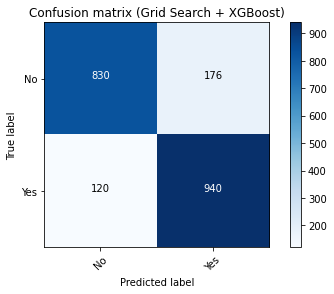

In [84]:
plot=plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix (Grid Search + XGBoost)',
                          cmap=plt.cm.Blues)

# Plot ROC Curves

In [81]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr_log_grid, tpr_log_grid, thresholds_log = roc_curve(y_test, y_pred_log_grid)
fpr_knn_grid, tpr_knn_grid, thresholds_knn = roc_curve(y_test, y_pred_knn_grid)
fpr_rfc_grid, tpr_rfc_grid, thresholds_rfc = roc_curve(y_test, y_pred_forest_grid)
fpr_nb_grid, tpr_nb_grid, thresholds_log = roc_curve(y_test, y_pred_nb_grid)
fpr_svc_grid, tpr_svc_grid, thresholds_log = roc_curve(y_test, y_pred_svc_grid)
fpr_xtree_grid, tpr_xtree_grid, thresholds_xtree = roc_curve(y_test, y_pred_xtree_grid)
fpr_ens, tpr_ens, thresholds_ens = roc_curve(y_test, scv_predicted)

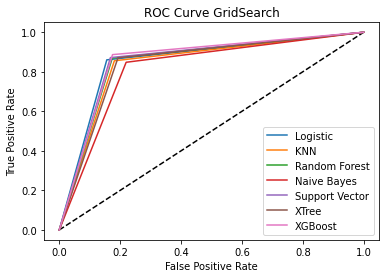

In [85]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_log_grid, tpr_log_grid,label = 'Logistic')
plt.plot(fpr_knn_grid, tpr_knn_grid,label = 'KNN')
plt.plot(fpr_rfc_grid, tpr_rfc_grid,label = 'Random Forest')
plt.plot(fpr_nb_grid,tpr_nb_grid,label= 'Naive Bayes')
plt.plot(fpr_svc_grid,tpr_svc_grid,label= 'Support Vector')
plt.plot(fpr_xtree_grid, tpr_xtree_grid,label = 'XTree')
plt.plot(fpr_ens, tpr_ens,label = 'XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve GridSearch')
plt.show()

In [83]:
# Compute and print AUC score
print("AUC Logistic: {}".format(roc_auc_score(y_test, y_pred_log_grid)))
print("AUC KNN: {}".format(roc_auc_score(y_test, y_pred_knn_grid)))
print("AUC Random Forest: {}".format(roc_auc_score(y_test, y_pred_forest_grid)))
print("AUC Naive Bayes: {}".format(roc_auc_score(y_test, y_pred_nb_grid)))
print("AUC Support Vector Classifier: {}".format(roc_auc_score(y_test, y_pred_svc_grid)))
print("AUC XTree Classifier: {}".format(roc_auc_score(y_test, y_pred_xtree_grid)))
print("AUC Ensemble: {}".format(roc_auc_score(y_test, scv_predicted)))

AUC Logistic: 0.8521568701001538
AUC KNN: 0.8373729322180128
AUC Random Forest: 0.8474558310514272
AUC Naive Bayes: 0.814215649499231
AUC Support Vector Classifier: 0.8518530327469148
AUC XTree Classifier: 0.8389558873176037
AUC Ensemble: 0.8559210773097266
